In [1]:
import pandas as pd
import numpy as np

import matplotlib ; import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
df_raw = pd.read_csv("rawdata/체질검사.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_raw_x = df_raw.drop(["FAT"], axis = 1)
df_raw_y = df_raw["FAT"]

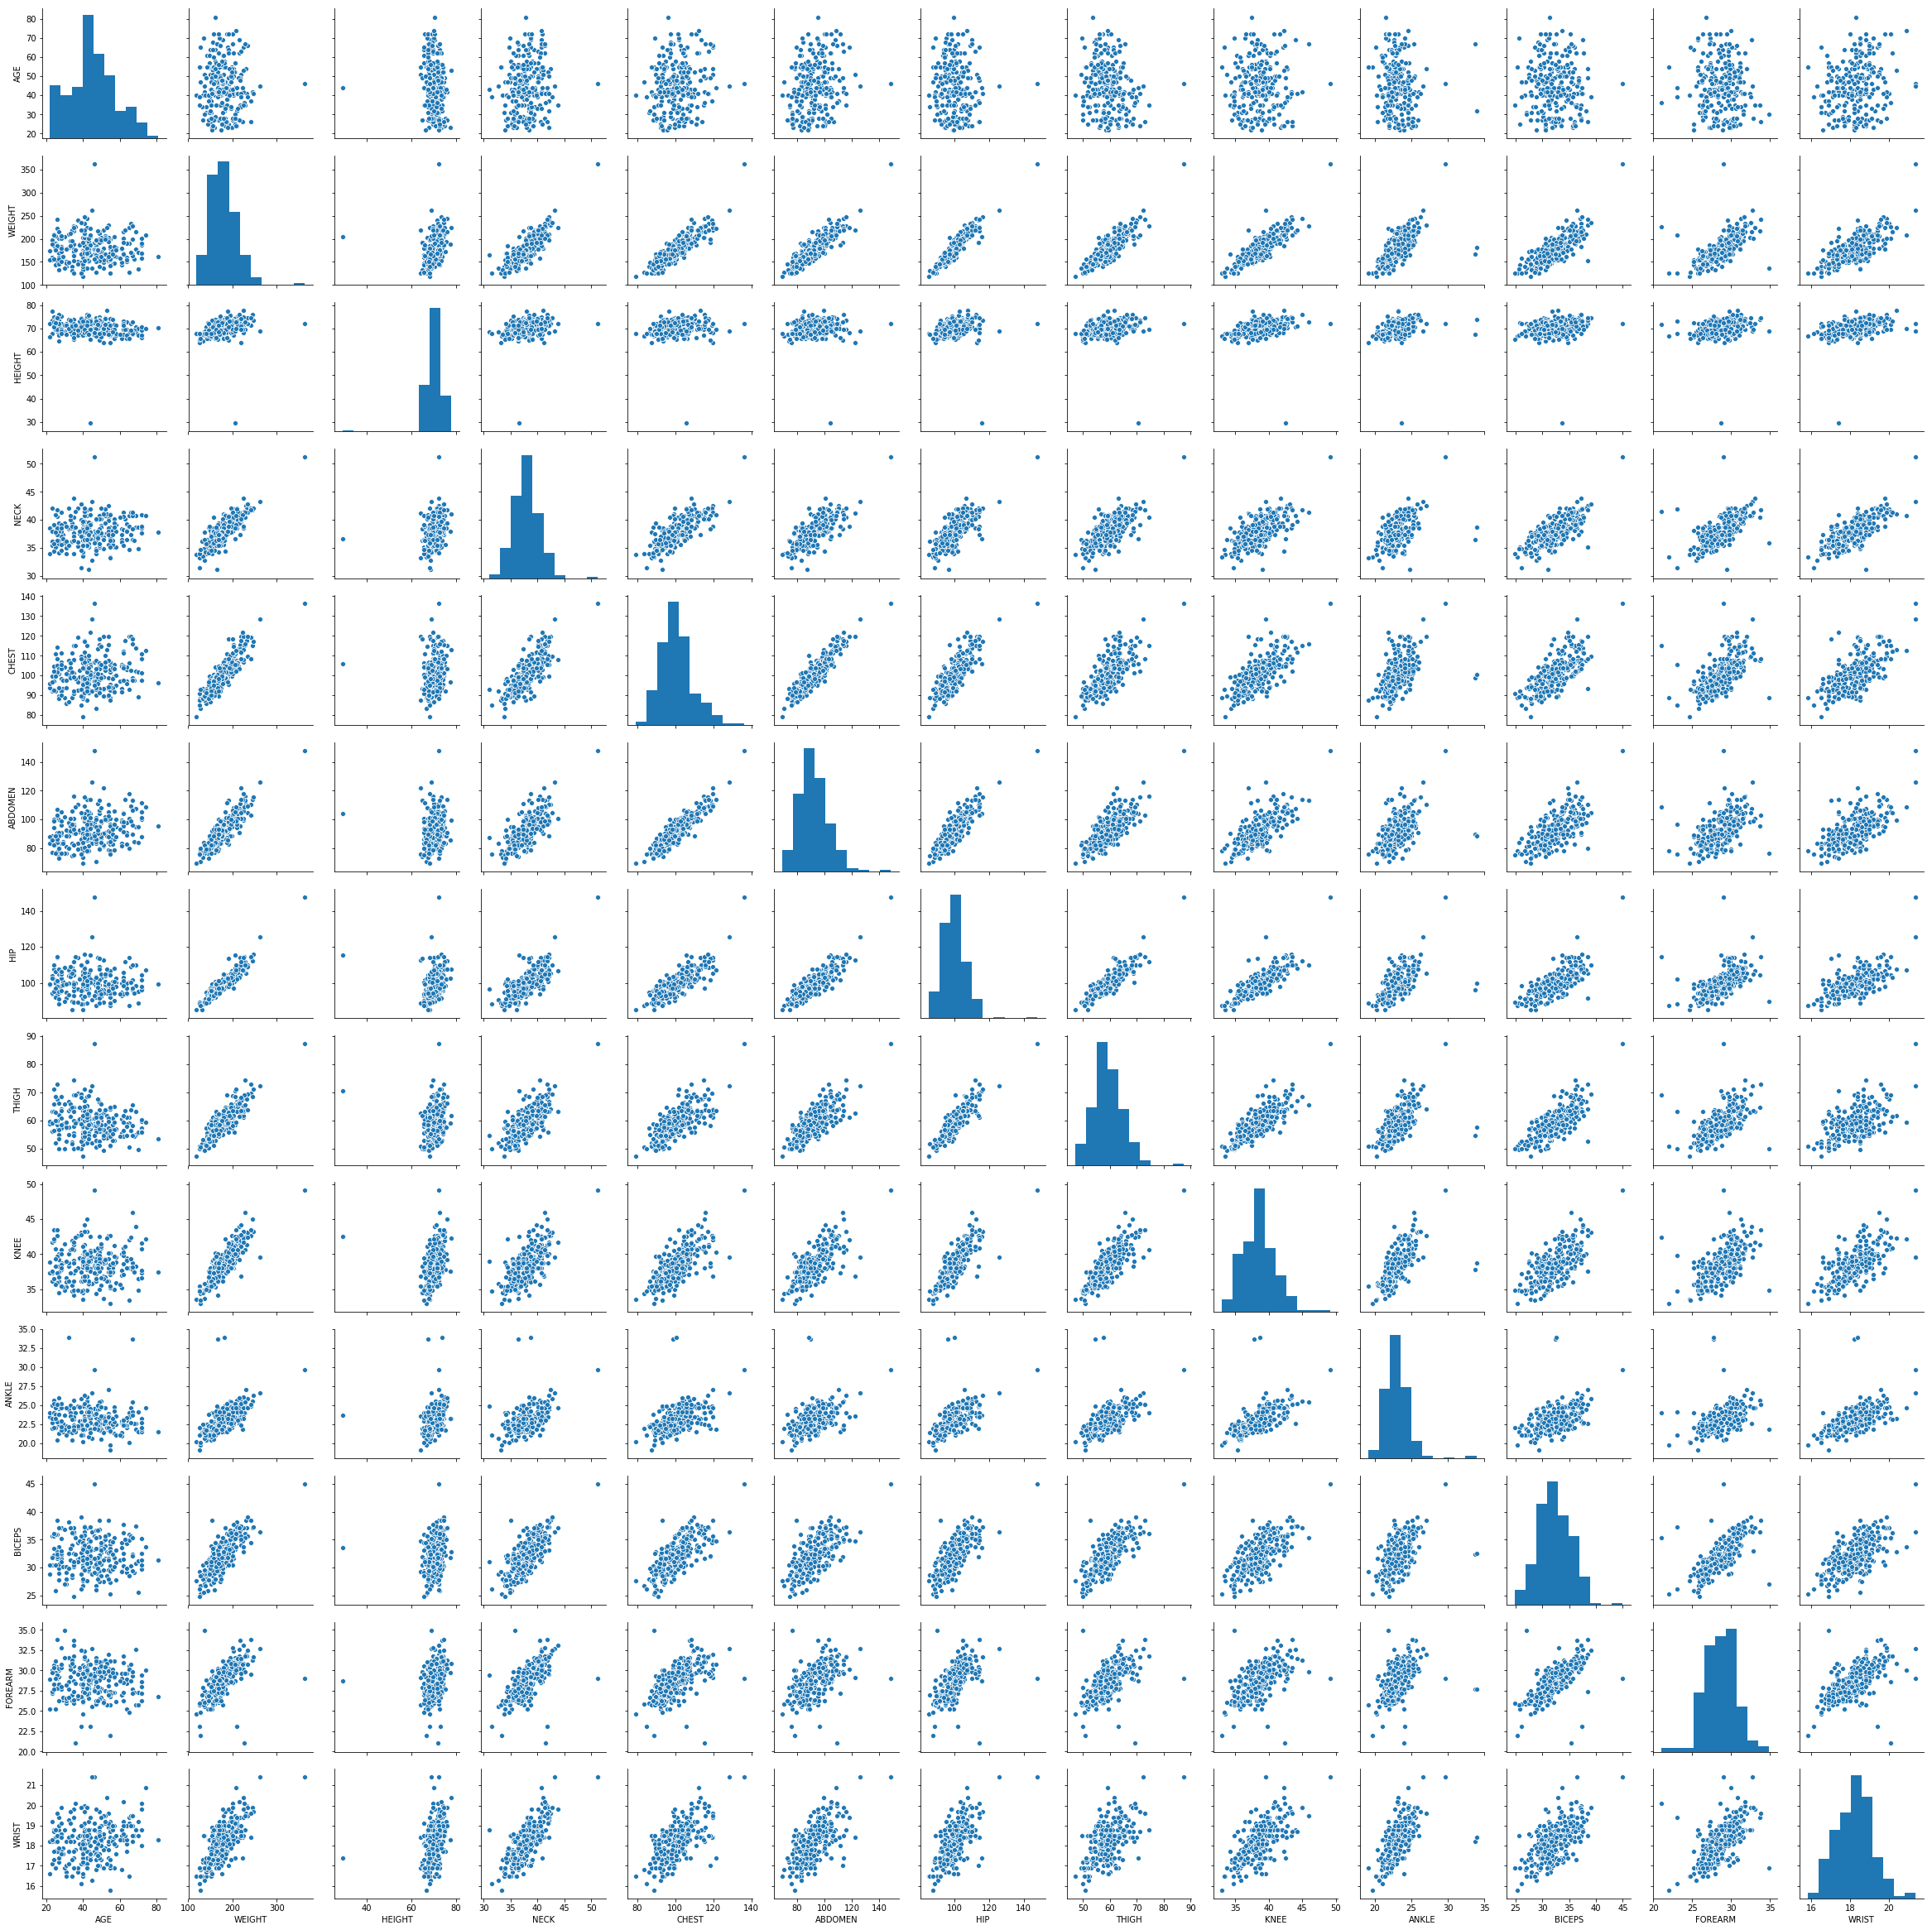

In [6]:
sns.pairplot(df_raw_x)

In [7]:
df_raw_x.corr().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
AGE,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665
ANKLE,-0.105,0.614,0.265,0.478,0.483,0.453,0.558,0.540,0.612,1.000,0.485,0.419,0.566


In [9]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [10]:
x_cols = df_raw_x.columns

In [11]:
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
print("Scaled Data: ")
print(nd_scaled[:5].round(3))
print("Shape: {}".format(nd_scaled.shape))

Scaled Data: 
[[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape: (252, 13)


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403
1,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612
2,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612
3,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427
4,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183


In [13]:
pca = PCA(n_components = len(df_raw_x.columns))
nd_pca = pca.fit_transform(df_scaled)
print("PCA Data: ")
print(nd_pca[:5].round(3))
print("Shape: {}".format(nd_pca.shape))

PCA Data: 
[[ 1.5141e+01  7.4900e-01  1.7300e+00  2.9760e+00 -1.2010e+00  1.9160e+00
  -5.6500e-01  6.4200e-01 -7.1700e-01  6.6700e-01  1.1180e+00 -3.7400e-01
  -4.0200e-01]
 [-1.2570e+00 -1.7980e+00 -6.0400e-01 -4.0600e-01  1.3330e+00  8.2200e-01
   1.7400e-01 -1.0180e+00  3.7000e-02  3.7700e-01 -8.8000e-02 -1.1500e-01
  -2.1900e-01]
 [-7.2700e-01  2.3190e+00 -8.9200e-01  6.8300e-01 -5.0300e-01  6.0000e-01
  -5.1600e-01 -1.0000e-02  4.8000e-02 -2.6400e-01  1.7600e-01 -7.7000e-02
  -1.3600e-01]
 [-3.2100e+00  1.4650e+00  4.5800e-01 -5.7600e-01  2.0000e-02 -1.7900e-01
   7.1700e-01  8.4300e-01  2.1800e-01 -2.5500e-01 -2.3900e-01 -1.0100e-01
  -1.2200e-01]
 [ 3.2470e+00  2.2930e+00  1.8280e+00 -2.3000e-02 -4.0700e-01  1.1470e+00
   1.7010e+00 -1.0100e-01  5.4000e-01  3.0500e-01  4.6800e-01  2.7500e-01
   9.0000e-02]]
Shape: (252, 13)


In [18]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin" + str(i) for i in range (1,14)])

In [28]:
df_sclaed_pca = df_scaled.join(df_pca)
df_sclaed_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [19]:
df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [l for l in range(1, 14)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
6,7,0.287,0.022,0.943
7,8,0.262,0.020,0.963
8,9,0.184,0.014,0.978
9,10,0.135,0.010,0.988


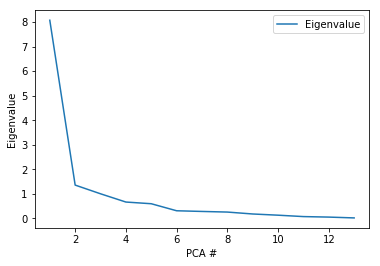

In [20]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label = "Eigenvalue")
plt.ylabel("Eigenvalue")
plt.xlabel("PCA #")
plt.legend(loc="best")

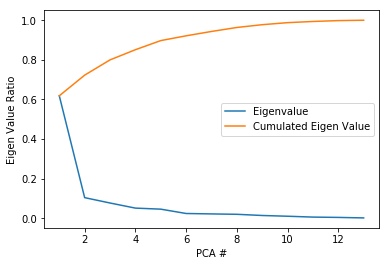

In [21]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label = "Eigenvalue")

# Drawing Cumulated Ratio graph
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label = "Cumulated Eigen Value")
plt.ylabel("Eigen Value Ratio")
plt.xlabel("PCA #")
plt.legend(loc="best")

In [22]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1, \
                                                columns = ["Prin" + str(i) for i in range (1,14)])], axis = 1)

df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,AGE,-0.010,-0.751,0.420,-0.079,-0.040,0.294,0.034,-0.207,0.152,-0.262,0.031,0.166,0.041
1,WEIGHT,-0.345,0.018,-0.039,-0.087,0.142,-0.031,-0.076,0.047,-0.061,0.019,-0.206,0.190,0.872
2,HEIGHT,-0.101,0.469,0.678,-0.082,0.485,0.115,-0.134,-0.102,-0.005,-0.124,0.062,-0.008,-0.090
3,NECK,-0.306,-0.090,0.121,0.206,0.055,-0.561,-0.007,0.115,0.703,0.048,-0.073,-0.013,-0.095
4,CHEST,-0.316,-0.209,-0.061,0.009,0.152,-0.070,-0.450,0.061,-0.248,0.431,0.398,0.409,-0.214
5,ABDOMEN,-0.312,-0.265,-0.122,-0.120,0.229,0.033,-0.295,0.086,-0.140,-0.086,-0.037,-0.791,-0.046
6,HIP,-0.326,-0.003,-0.221,-0.178,0.163,0.045,0.049,0.101,-0.134,-0.323,-0.609,0.343,-0.403
7,THIGH,-0.310,0.123,-0.322,-0.077,0.096,0.062,0.273,-0.041,0.115,-0.522,0.631,0.073,0.018
8,KNEE,-0.308,0.050,0.001,-0.247,0.005,0.497,0.443,0.137,0.272,0.540,-0.013,-0.088,-0.076
9,ANKLE,-0.231,0.224,0.128,-0.500,-0.679,-0.032,-0.347,-0.167,0.106,-0.080,0.011,-0.024,-0.035


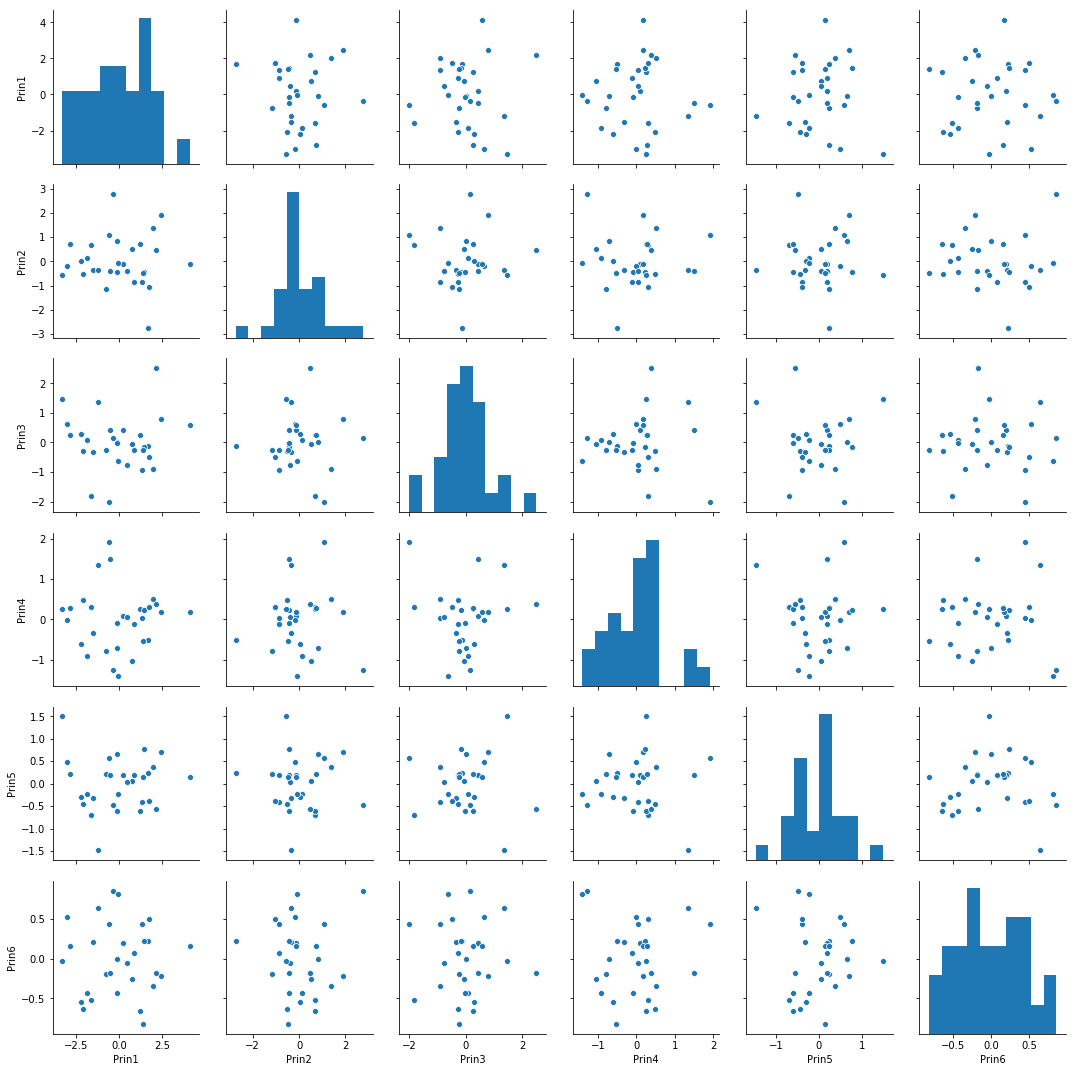

In [44]:
sns.pairplot(df_pca)

In [23]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
Prin1,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
Prin4,-0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
Prin5,0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
Prin6,-0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
Prin7,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0
Prin8,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin9,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,0.0,-0.0,0.0
Prin10,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0


In [24]:
# 원데이터에 절편(const) 추가
df_raw_x_const = sm.add_constant(df_raw_x)
df_raw_x_const.head()
# const 기본값 1 주는 건가
# 왜 주는 거지...?

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1.0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,1.0,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,1.0,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,1.0,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,1.0,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [49]:
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.24e-05
Time:                        10:48:33   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [51]:
x_var = ["Prin" + str(i) for i in range (1, 4)]

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.02e-05
Time:                        10:50:21   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0